## Import Library

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


## Load Data

In [2]:
data = pd.read_csv("Z:\ML\Assignment3\Titanic.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


## Data Cleaning

In [3]:
missing_values = data.isnull().sum()
print(missing_values)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


#### Missing values of Age, Fare, Cabin

In [4]:
# Age with median
data['Age'].fillna(data['Age'].median(), inplace=True)

# Drop Cabin 
data.drop('Cabin', axis=1, inplace=True)

# Embarked with the mode
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

# Fare with median
data['Fare'].fillna(data['Fare'].median(), inplace=True)


In [5]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,27.0,0,0,A.5. 3236,8.0500,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,0,3,"Ware, Mr. Frederick",male,27.0,0,0,359309,8.0500,S


#### Cleaned data

In [6]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## EDA

In [7]:
print(data.describe())


       PassengerId    Survived      Pclass         Age       SibSp  \
count   418.000000  418.000000  418.000000  418.000000  418.000000   
mean   1100.500000    0.363636    2.265550   29.599282    0.447368   
std     120.810458    0.481622    0.841838   12.703770    0.896760   
min     892.000000    0.000000    1.000000    0.170000    0.000000   
25%     996.250000    0.000000    1.000000   23.000000    0.000000   
50%    1100.500000    0.000000    3.000000   27.000000    0.000000   
75%    1204.750000    1.000000    3.000000   35.750000    1.000000   
max    1309.000000    1.000000    3.000000   76.000000    8.000000   

            Parch        Fare  
count  418.000000  418.000000  
mean     0.392344   35.576535  
std      0.981429   55.850103  
min      0.000000    0.000000  
25%      0.000000    7.895800  
50%      0.000000   14.454200  
75%      0.000000   31.471875  
max      9.000000  512.329200  


The dataset contains 418 passengers with the following key statistics:

    Survived: 36.36% of passengers survived, and 63.64% did not.
    Pclass: The majority of passengers are from 2nd and 3rd class, with 25% in 1st class.
    Age: The average age is 29.6 years, with a minimum age of 0.17 years (a baby) and a maximum of 76 years.
    SibSp: Most passengers have no or only one sibling/spouse aboard, with a maximum of 8.
    Parch: Most passengers have no parents/children aboard, with a maximum of 9.
    Fare: The average fare is 35.58, with a wide range from 0 to 512.33, suggesting some passengers paid much higher fares.

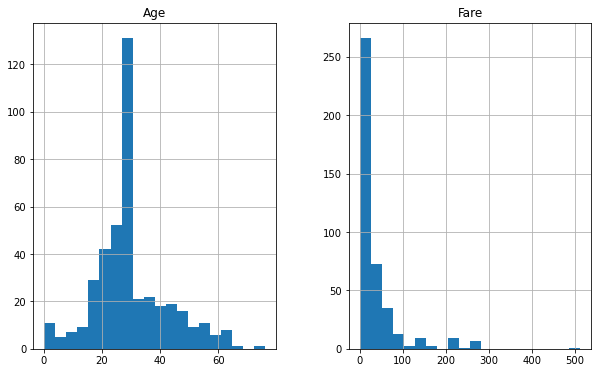

In [8]:
# Plot histogram for Age and Fare
data[['Age', 'Fare']].hist(bins=20, figsize=(10, 6))
plt.show()

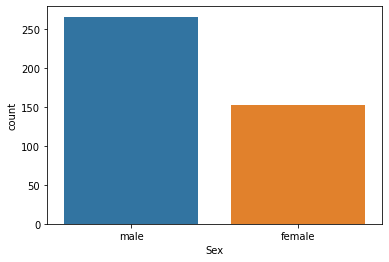

In [9]:
# Plot bar chart for categorical features (Sex, Pclass)
sns.countplot(x='Sex', data=data)
plt.show()

#### More male in data

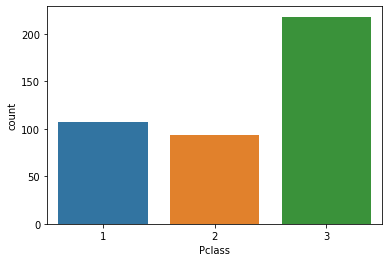

In [10]:
sns.countplot(x='Pclass', data=data)
plt.show()

Check if there are any important correlations between numerical features.

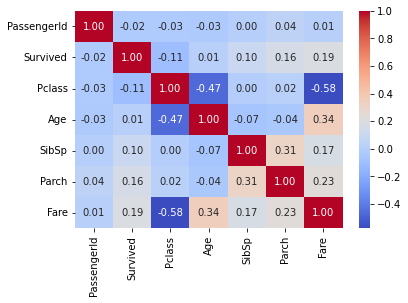

In [11]:
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()


#### survival was most influenced by passenger class, while other factors like age and family size showed weaker relationships.

## Feature Engineering

Convert categorical features into numeric ones:

    Sex: Convert into binary (0 = male, 1 = female).
    Embarked: Convert categorical values (S, C, Q) into numerical values.
    Pclass: No need for conversion as it's already numeric.

In [12]:
# Convert 'Sex' to binary
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})

# Convert 'Embarked' to numeric
data['Embarked'] = data['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})

In [13]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,2
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,0
2,894,0,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,2
3,895,0,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,0
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,0
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",0,27.0,0,0,A.5. 3236,8.0500,0
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,PC 17758,108.9000,1
415,1307,0,3,"Saether, Mr. Simon Sivertsen",0,38.5,0,0,SOTON/O.Q. 3101262,7.2500,0
416,1308,0,3,"Ware, Mr. Frederick",0,27.0,0,0,359309,8.0500,0


## Feature scaling

benefit from scaling numerical features like Age, Fare

In [14]:
scaler = StandardScaler()
data[['Age', 'Fare']] = scaler.fit_transform(data[['Age', 'Fare']])


## Feature Selection

In [15]:
correlation = data.corr()
print(correlation['Survived'].sort_values(ascending=False))


Survived       1.000000
Sex            1.000000
Fare           0.192036
Parch          0.159120
Embarked       0.126779
SibSp          0.099943
Age            0.008035
PassengerId   -0.023245
Pclass        -0.108615
Name: Survived, dtype: float64


## Train the Logistic Regression Model

In [16]:
X = data[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']]  # Selected features
y = data['Survived']  # Target


In [17]:
#train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [18]:
#train model

model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

## Model Evaluation

In [19]:
#Accuracy
accuracy = model.score(X_test, y_test)
print(f'Accuracy: {accuracy}')


Accuracy: 1.0


#### The accuracy is 1.00 (100%) for the given data, meaning the model correctly predicted all 84 instances. This suggests that there are no errors in prediction.

In [20]:
# Confussion 
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm)


Confusion Matrix:
[[50  0]
 [ 0 34]]


<b>Class 0 (Non-survivors): The model correctly predicted all 50 instances as class 0 (no false positives or false negatives).
<br>
Class 1 (Survivors): The model correctly predicted all 34 instances as class 1.
    </b>

In [21]:
#classification
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



#### The confusion matrix shows that there were no misclassifications 

## Conclusion

<b>The model achieved perfect accuracy 100% with a confusion matrix indicating no misclassifications, but this could be due to overfitting or data leakage.<br>
Precision, recall, and F1-score are all 1.00 for both classes, indicating ideal performance on the test data</b>